In [1]:
import pandas as pd
import numpy as np
import math
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [14]:
with open('../dataframes/df_with_libs.p','rb') as read_file:
    df = pickle.load(read_file)
df = df[df['CENSUS BLOCK']!=8435001023]


In [3]:
blocks_dict = {}
for index,row in df.iterrows():
    blocks_dict[row['CENSUS BLOCK']] =[row['block_lat'],row['block_lon']]

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
X = df.drop(columns = ['CENSUS BLOCK', 'closest_el', 'daily_rides_closest_el', 
                       'block_lat', 'block_lon', 'best_shops_under_001'])
X = StandardScaler().fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
km = KMeans()
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
label_count = defaultdict(int)
for x in km.labels_:
    label_count[x] += 1
label_count

defaultdict(int,
            {4: 10962,
             5: 661,
             0: 21950,
             1: 3536,
             3: 1103,
             6: 196,
             2: 7882,
             7: 1})

In [9]:
block_best_shops = {}
blocks = []
for index, value in df.iterrows():
      block_best_shops[value['CENSUS BLOCK']] = value['best_shops_under_001']
      blocks.append(value['CENSUS BLOCK'])


In [10]:
label_best_shop_count = defaultdict(int)
for block,label in zip(blocks,km.labels_):
    label_best_shop_count[label] += block_best_shops[block]
    

In [11]:
label_best_shop_count

defaultdict(int, {4: 0, 5: 3, 0: 0, 1: 0, 3: 112, 6: 24, 2: 0, 7: 0})

In [26]:
labels_km = list(km.labels_)
df['km_8_labels'] = labels_km

In [27]:
df.to_csv('../../visualization/kmeans_map/df_with_lib_and_labels.csv')

In [28]:
km.cluster_centers_

array([[-1.83132298e-01, -1.93790682e-01, -1.49608019e-01,
        -1.23051948e-01, -2.15939887e-01,  1.10190400e+00],
       [-1.73966629e-01, -2.38801440e-01, -1.49608019e-01,
         1.76321795e+00, -3.03235645e-01, -2.33343677e-02],
       [-3.68468643e-02,  8.89303205e-01, -1.49608019e-01,
        -5.06507663e-01,  1.76757515e+00, -2.89459492e-01],
       [ 4.89737968e+00,  2.43799455e-01,  2.78130527e-02,
        -6.28845377e-01,  3.21072016e-01, -3.46876846e-01],
       [ 1.24220711e-02, -1.38037421e-01, -1.49608019e-01,
        -4.30286792e-01, -1.64309169e-01, -4.66192327e-01],
       [-8.04130338e-02,  9.02142989e+00,  6.38217877e+00,
        -1.04383269e+00,  6.82718289e+00, -5.53469520e-01],
       [-7.26831403e-02,  1.80801546e+00,  4.86963133e+00,
        -6.46950005e-01,  5.46725268e-01, -3.19755647e-01],
       [ 1.06481776e+02, -3.55366472e-01, -1.49608019e-01,
        -1.74772479e-01, -5.18052261e-01,  1.56728833e-01]])

In [29]:
list(df.drop(columns = ['CENSUS BLOCK', 'closest_el', 'daily_rides_closest_el', 
                       'block_lat', 'block_lon', 'best_shops_under_001','km_8_labels']))

['TOTAL POPULATION',
 'bus_within_001',
 'cof_within_001',
 'dist_to_closest_el',
 'crime_count',
 'dist_to_closest_library']

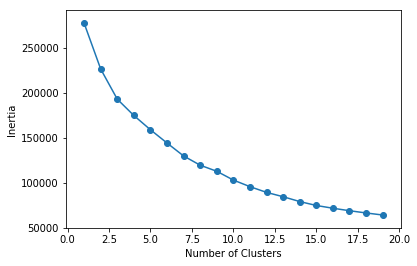

In [32]:
inertia = []
list_num_clusters = list(range(1,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

## PCA for viz

In [76]:
import seaborn as sns

In [33]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)

In [38]:
pca_one = X[:,0]
pca_two = X[:,1]

In [81]:
km = KMeans(n_clusters=8)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

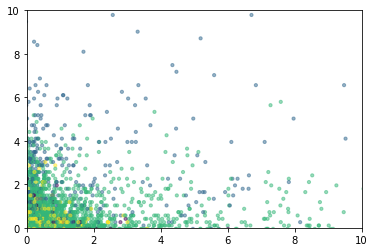

In [75]:

plt.xlim(right=10)
plt.ylim(top=10)
plt.scatter(pca_one, pca_two, c=km.labels_, s=10, alpha=.5)

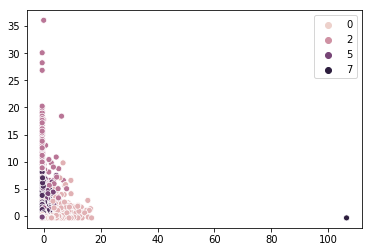

In [82]:
sns.scatterplot(x=pca_one,y=pca_two, hue=km.labels_)

## Weighted KMeans

In [57]:
with open('../dataframes/df_with_libs.p','rb') as read_file:
    df = pickle.load(read_file)
bestshops = df['best_shops_under_001'].values
bestshops += 1
bestshops = bestshops **2

best_count = defaultdict(int)
for x in bestshops:
    best_count[x] += 1
best_count

defaultdict(int, {1: 46156, 4: 131, 9: 4})

In [59]:
km.fit(X, sample_weight=bestshops)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
label_count = defaultdict(int)
for x in km.labels_:
    label_count[x] += 1
label_count

defaultdict(int,
            {4: 11171,
             3: 659,
             1: 22322,
             5: 2892,
             7: 1066,
             2: 205,
             0: 7975,
             6: 1})

In [61]:
df['km_weight_labels'] = km.labels_

## KMeans no SS

In [13]:
X = df.drop(columns = ['CENSUS BLOCK', 'closest_el', 'daily_rides_closest_el', 
                       'block_lat', 'block_lon', 'best_shops_under_001'])
X =StandardScaler().fit_transform(X)
km = KMeans(n_clusters=12)
km.fit(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

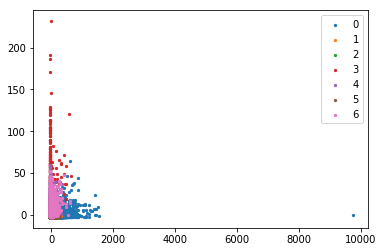

In [7]:
X = df.drop(columns = ['CENSUS BLOCK', 'closest_el', 'daily_rides_closest_el', 
                       'block_lat', 'block_lon', 'best_shops_under_001'])
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]

df_km = df
df_km['km_labs'] = km.labels_
df_km['pca_one'] = pca_one
df_km['pca_two'] = pca_two

labels = np.unique(km.labels_)

for kmlabel in np.unique(labels):
    df_for_plot = df_km[df_km.km_labs == kmlabel]
    df_pca_one = df_for_plot.pca_one
    df_pca_two = df_for_plot.pca_two
    bus = df_for_plot.cof_within_001
    plt.scatter(df_pca_one, df_pca_two, s=5, label=kmlabel)
plt.legend()

## Save to file

In [63]:
df.to_csv('data/kmeans_bestweighted_cluster8.csv')

In [64]:
with open('data/kmeans_bestweighted_cl8_df.p','wb') as write_file:
    pickle.dump(df, write_file)

In [65]:
with open('data/kmeans_bestweighted_cl8_kmfit.p','wb') as write_file:
    pickle.dump(km, write_file)

## Kmeans

In [15]:
X = df.drop(columns = ['CENSUS BLOCK', 'closest_el', 'daily_rides_closest_el', 
                       'block_lat', 'block_lon', 'best_shops_under_001'])
km = KMeans(n_clusters=7)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

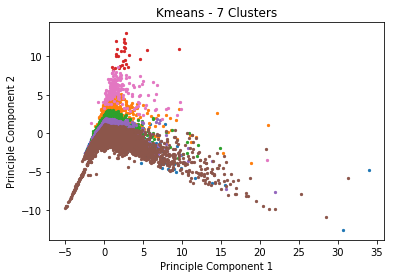

In [21]:
pca = PCA(n_components = 2)
X =StandardScaler().fit_transform(X)
pca_result = pca.fit_transform(X)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]

df_km = df
df_km['km_labs'] = km.labels_
df_km['pca_one'] = pca_one
df_km['pca_two'] = pca_two

labels = np.unique(km.labels_)

for kmlabel in np.unique(labels):
    df_for_plot = df_km[df_km.km_labs == kmlabel]
    df_pca_one = df_for_plot.pca_one
    df_pca_two = df_for_plot.pca_two
    bus = df_for_plot.cof_within_001
    plt.scatter(df_pca_one, df_pca_two, s=5)
plt.title('Kmeans - 7 Clusters')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.savefig('kmeans_7clus.svg')